In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns


In [3]:
prosecutors = pd.read_csv("../data/FlynnResign.csv")

In [4]:
prosecutors.head()

,First name,Last name,Highest DOJ title,# years DOJ service,Admins served under
0,Dianne,(Kelly) Sanford,"Assistant Chief, Environmental Enforcement Sec...",13.0,"Bush I, Reagan, Carter"
1,Erin,(Powell) Vespe,Trial Attorney,4.5,"Bush II, Clinton"
2,Julie,Abbate,"Deputy Chief, Special Litigation Section, Civi...",15.0,"Trump, Obama, Bush II"
3,Jonathan,Abernethy,Assistant United States Attorney,7.0,Bush II
4,Elkan,Abramowitz,"Chief, Criminal Division, SDNY",6.0,"Carter, Ford, Nixon, Johnson"


In [5]:
prosecutors.describe()

,# years DOJ service
count,1955.000000
mean,12.919130
std,10.601451
min,0.400000
25%,5.000000
50%,8.000000
75%,20.000000
max,52.000000


In [6]:
# replace semicolons with commas for seperating admins
prosecutors["Admins served under"] = prosecutors["Admins served under"].str.replace(";",",")

In [7]:
prosecutors.describe()

,# years DOJ service
count,1955.000000
mean,12.919130
std,10.601451
min,0.400000
25%,5.000000
50%,8.000000
75%,20.000000
max,52.000000


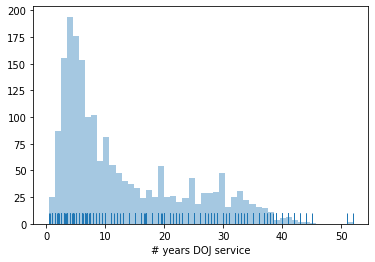

In [33]:
sns.distplot(prosecutors["# years DOJ service"], bins=50, kde=False, rug=True)

In [9]:
prosecutors["# years DOJ service"].mean()

12.919130434782609

In [10]:
prosecutors["# years DOJ service"].median()

8.0

In [11]:
adminDur = {'Trump':2.3,'Obama':8,"Bush II":8,'Clinton':8,'Bush I':4,'Reagan':8,'Carter':4,'Ford':2.34,
           'Nixon':5.6, 'Johnson':5.15, 'Kennedy':2.84, 'Eisenhower':8}

presParty = {'Trump':'R','Obama':'D',"Bush II":'R','Clinton':'D','Bush I':'R','Reagan':'R','Carter':'D','Ford':'R',
           'Nixon':'R', 'Johnson':'D', 'Kennedy':'D', 'Eisenhower':'R'}

# inspired by https://gist.github.com/jlln/338b4b0b55bd6984f883
def splitDataFrameList(df,target_column,separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split
    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row,row_accumulator,target_column,separator):
        split_row = [admin.strip() for admin in row[target_column].split(separator)]
        number_elem = len(split_row)
        last = split_row[-1:][0]
        for s in split_row:
            admin = s
            new_row = row.to_dict()
            new_row[target_column] = admin
            new_row["approx # years by admin"] = min(adminDur[admin],row["# years DOJ service"]/number_elem)
            new_row["Party when started"] = presParty[last]
            row_accumulator.append(new_row)
        
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    
    new_df = pd.DataFrame(new_rows)
    return new_df

In [12]:
assert adminDur["Obama"] == 8

In [13]:
prosecutorsByAdmin = splitDataFrameList(prosecutors,"Admins served under",",")

In [14]:
prosecutorsByAdmin.astype('object').describe().transpose()

,count,unique,top,freq
First name,5846,763,Robert,213
Last name,5846,1656,Smith,38
Highest DOJ title,5846,977,Assistant United States Attorney,840
# years DOJ service,5846,82,6,291
Admins served under,5846,12,Clinton,994
approx # years by admin,5846,119,4,1157
Party when started,5846,2,R,3594


In [15]:
prosecutorsByAdmin[0:9]

,First name,Last name,Highest DOJ title,# years DOJ service,Admins served under,approx # years by admin,Party when started
0,Dianne,(Kelly) Sanford,"Assistant Chief, Environmental Enforcement Sec...",13.0,Bush I,4.000000,D
1,Dianne,(Kelly) Sanford,"Assistant Chief, Environmental Enforcement Sec...",13.0,Reagan,4.333333,D
2,Dianne,(Kelly) Sanford,"Assistant Chief, Environmental Enforcement Sec...",13.0,Carter,4.000000,D
3,Erin,(Powell) Vespe,Trial Attorney,4.5,Bush II,2.250000,D
4,Erin,(Powell) Vespe,Trial Attorney,4.5,Clinton,2.250000,D
5,Julie,Abbate,"Deputy Chief, Special Litigation Section, Civi...",15.0,Trump,2.300000,R
6,Julie,Abbate,"Deputy Chief, Special Litigation Section, Civi...",15.0,Obama,5.000000,R
7,Julie,Abbate,"Deputy Chief, Special Litigation Section, Civi...",15.0,Bush II,5.000000,R
8,Jonathan,Abernethy,Assistant United States Attorney,7.0,Bush II,7.000000,R


In [16]:
unique_starting_party = prosecutorsByAdmin[["First name","Last name","# years DOJ service","Party when started"]].drop_duplicates()

In [17]:
# checking for 12 unique admins
assert len(prosecutorsByAdmin["Admins served under"].unique()) == 12

In [18]:
pd.value_counts(unique_starting_party["Party when started"])

R    1119
D     835
Name: Party when started, dtype: int64

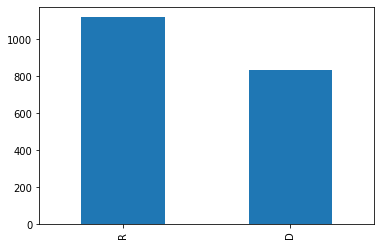

In [19]:
pd.value_counts(unique_starting_party["Party when started"]).plot(kind="bar")

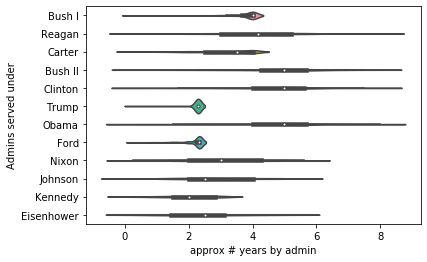

In [20]:
sns.violinplot(y="Admins served under",x="approx # years by admin",data=prosecutorsByAdmin,estimator=sum)
# every service longer than 8 years is suspicous: likely data entry error 

In [21]:
prosecutorsByAdmin[prosecutorsByAdmin["approx # years by admin"]>8]

,First name,Last name,Highest DOJ title,# years DOJ service,Admins served under,approx # years by admin,Party when started


In [22]:
prosecutorsByAdmin[prosecutorsByAdmin["# years DOJ service"]<0]

,First name,Last name,Highest DOJ title,# years DOJ service,Admins served under,approx # years by admin,Party when started


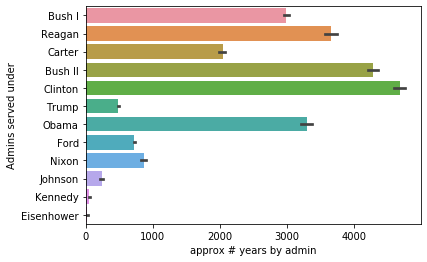

In [23]:
ax = sns.barplot(y="Admins served under",x="approx # years by admin",data=prosecutorsByAdmin,estimator=sum)

In [24]:
prosecutorsByAdmin[prosecutorsByAdmin["Admins served under"]=="Trump"].sort_values(["# years DOJ service"],ascending =  False)

,First name,Last name,Highest DOJ title,# years DOJ service,Admins served under,approx # years by admin,Party when started
3709,D. Patrick,Mullarkey,"Acting Deputy Assistant Attorney General, Tax",52.0,Trump,2.3,D
3218,Stephen,Lyons,Senior Trial Attorney,51.0,Trump,2.3,D
1991,Mark,Gross,"Deputy Chief, Appellate Section, Civil Rights ...",44.0,Trump,2.3,R
3117,Michael,Lindemann,"Chief, National Security Unit",42.0,Trump,2.3,R
2820,John,Kolar,Senior Trial Counsel,41.0,Trump,2.3,R
...,...,...,...,...,...,...,...
3780,Erica,Newland,Attorney Advisor,2.0,Trump,1.0,D
4843,Ilyce,Shugall,Immigration Judge,1.5,Trump,1.5,R
5163,Nikhel,Sus,"Trial Attorney, Civil Division, Federal Progra...",1.0,Trump,1.0,R
4063,Ashwin,Phatak,Attorney-Advisor,1.0,Trump,0.5,D


In [25]:
prosecutorsObstruction = pd.read_excel("../data/FederalProsecutors.xls")

In [26]:
# drop the first row (David W. Mernitz does not have a valid value for years in DOJ service)
prosecutorsObstruction = prosecutorsObstruction[1:]

In [27]:
# replace semicolons with commas for seperating admins
prosecutorsObstruction["Admins served under"] = prosecutorsObstruction["Admins served under"].str.replace(";",",")

In [28]:
prosecutorsObstruction.describe()

,# years DOJ service
count,1026.000000
mean,12.459064
std,9.824783
min,1.000000
25%,5.000000
50%,8.000000
75%,18.000000
max,43.000000


In [29]:
intersection = pd.merge(prosecutorsObstruction,prosecutors, how='inner', on=['Last name', 'First name'])

In [30]:
intersection

,First name,Last name,Highest DOJ title_x,# years DOJ service_x,Admins served under_x,Highest DOJ title_y,# years DOJ service_y,Admins served under_y
0,Frederick,Hess,"Director Office of Enforcement Operations, Cri...",43.0,"Obama, Bush II, Clinton, Bush I, Reagan, Carte...","Director, Office of Enforcement Operations, Cr...",43.0,"Obama, Bush II, Clinton, Bush I, Reagan, Carte..."
1,Gary,Shapiro,"Interim United States Attorney, Northern Distr...",42.0,"Obama, Bush II, Clinton, Bush I, Reagan, Carte...",Interim United States Attorney,42.0,"Obama, Bush II, Clinton, Bush I, Reagan, Carte..."
2,John,Kolar,Senior Trial Counsel,41.0,"Trump,Obama,Bush II,Clinton,Bush I,Reagan,Cart...",Senior Trial Counsel,41.0,"Trump, Obama, Bush II, Clinton, Bush I, Reagan..."
3,Gerald,Kaminski,Deputy Civil Chief,40.0,"Obama, Bush II, Clinton, Bush I, Reagan, Carte...",Deputy Civil Division Chief,40.0,"Obama, Bush II, Clinton, Bush I, Reagan, Carte..."
4,Judith,Rabinowitz,Assistant Director,38.5,"Obama, Bush II, Clinton, Bush I, Reagan, Carter","Assistant Director, Civil Division",38.5,"Trump, Obama, Bush II, Clinton, Bush I, Reagan..."
...,...,...,...,...,...,...,...,...
569,John,Edwards,United States Attorney for the Western Distric...,1.5,"Reagan, Carter",United States Attorney for the Western Distric...,2.0,"Reagan, Carter"
570,Robert,Martin,Special Assistant United States Attorney,1.0,Reagan,Special Assistant United States Attorney,1.0,Reagan
571,Charles,Carnese,Assistant U.S. Attorney,1.0,Ford,Assistant United States Attorney,3.0,"Ford, Nixon"
572,Albert,Alschuler,Special Assistant to the Assistant Attorney Ge...,1.0,Johnson,Special Assistant to the Assistant Attorney Ge...,1.0,Johnson
